# <font color='fuchsia'> Rossmann Store Salles Prediction </font>

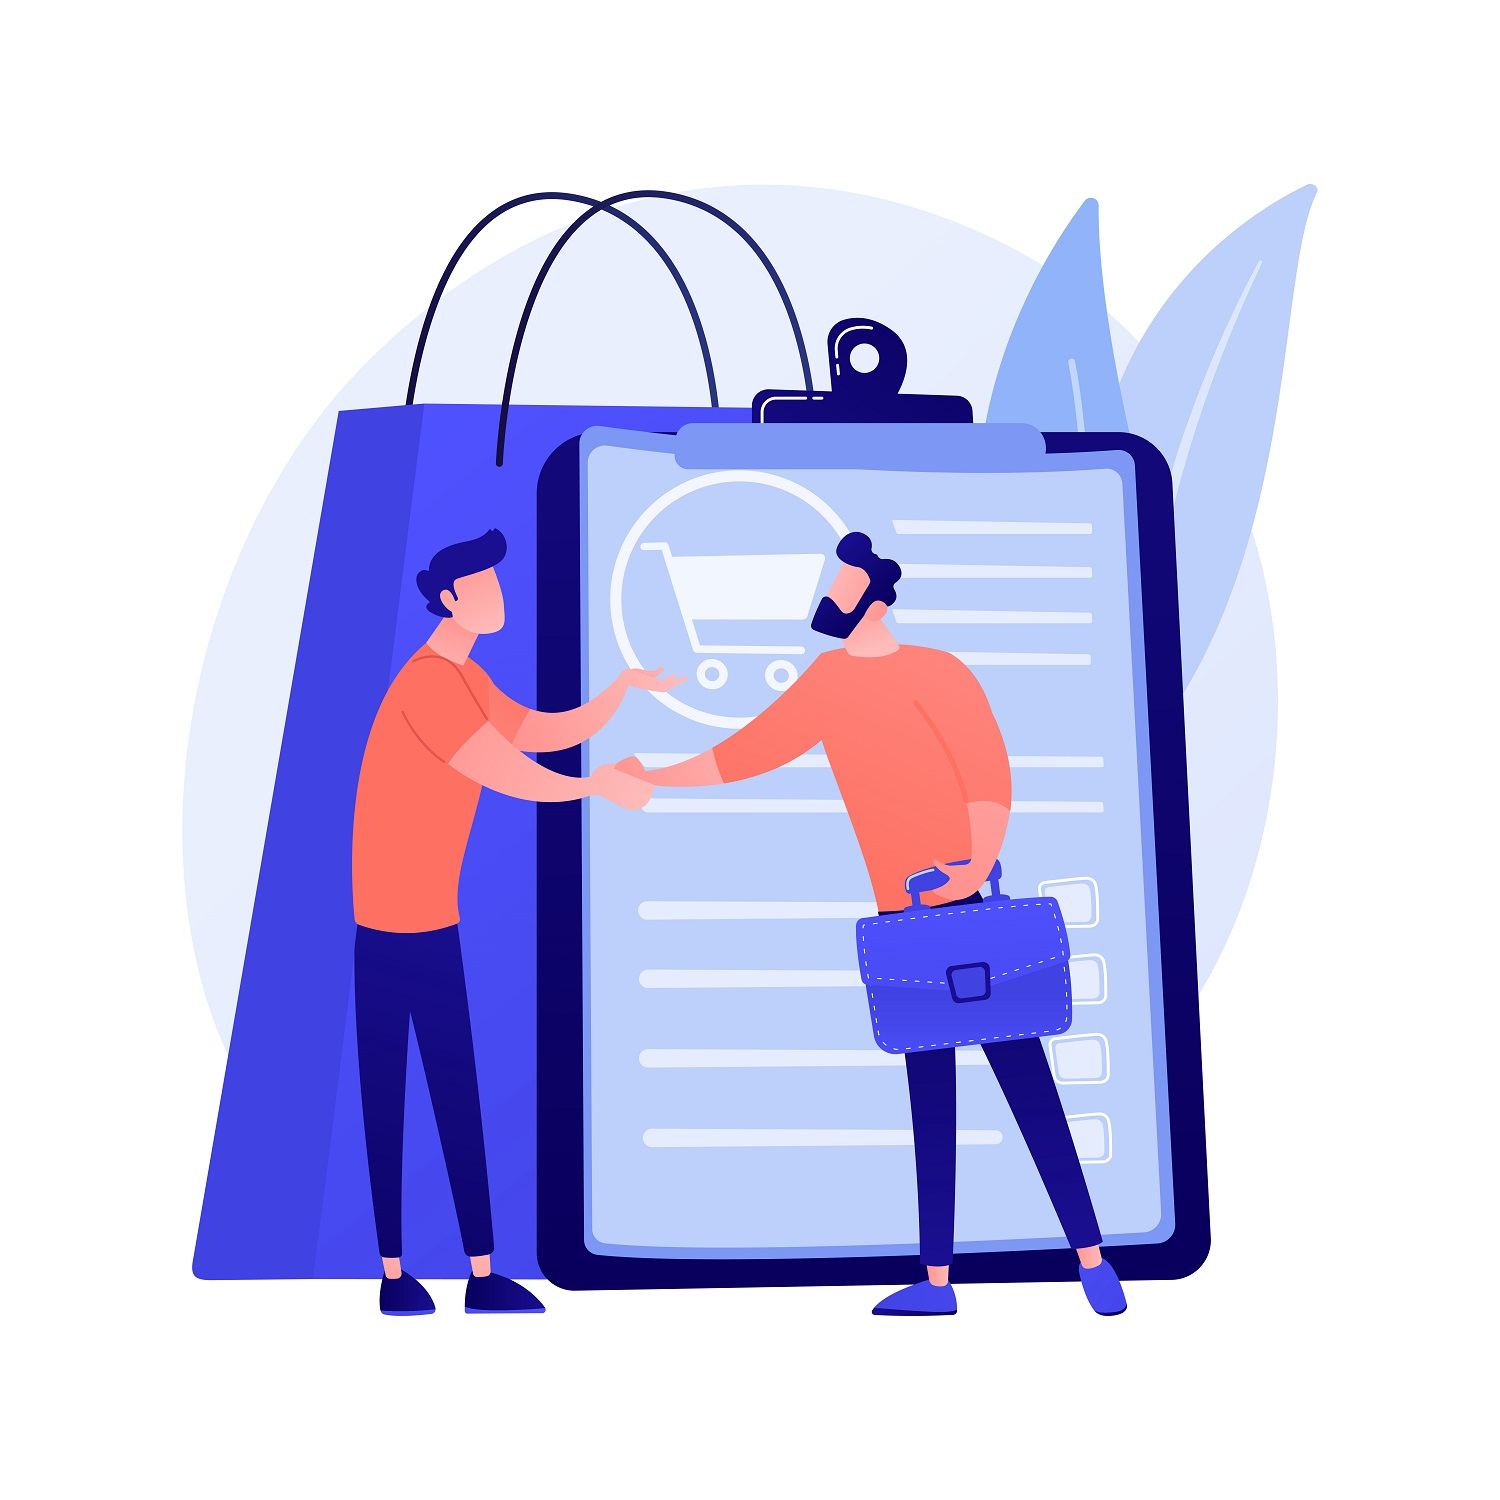

In [9]:
from IPython.display import Image
Image ('/Users/adriele/Documents/repos/ds_em_producao/image/img_sales.jpeg')

## Agenda

1. Context;
2. Challenge; 
3. Solution Development;
4. Conclusion and Demostration;
5. Next Steps;

#  <font color='fuchsia'>1.  Context </font>

- Monthly Results Meeting
- CFO asked for an Sales Prediction of next 6 weeks for each stores.



# <font color='fuchsia'>2. Challenge </font>

## Problem
- Buget definition for the refurbishment of stores.

## Cause
- The current Sales Prediction displays many divergence;
- The Sales Prediction process is based on pass experiences;
- All of Sales Prediction has been done manually by 1.115 Rossmann Stores;
- The visualisation of Sales is limited by computer;

## Solution
- Use Machine Learning to perform the Sales Prediction for all Stores;
- The visualization of Salles Prediction can be seen by a Smartphone;



# <font color='fuchsia'>3. Solution Development </font>

#  <font color='green'> Data Description </font>

In [26]:
print ('number of cols {}'.format (df1.shape [0] ) )
print ('number of rows {}'.format (df1.shape [1] ) )

number of cols 1017209
number of rows 18


#  <font color='green'> Descriptive Startistical </font>

In [37]:
# Central Tendency - mean, Median
ct1 = pd.DataFrame (num_attributes.apply (np.mean) ).T
ct2 = pd.DataFrame (num_attributes.apply (np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply (np.std) ).T
d2 = pd.DataFrame (num_attributes.apply (min)).T
d3 = pd.DataFrame (num_attributes.apply (max)).T
d4 = pd.DataFrame (num_attributes.apply (lambda x: x.max () -x.min ()) ).T
d5 = pd.DataFrame (num_attributes.apply (lambda x: x.skew () ) ).T
d6 = pd.DataFrame (num_attributes.apply (lambda x: x.kurtosis ()) ).T

# Concatane
m =pd.concat ([ d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# <font color='green'> Mind Map </font>


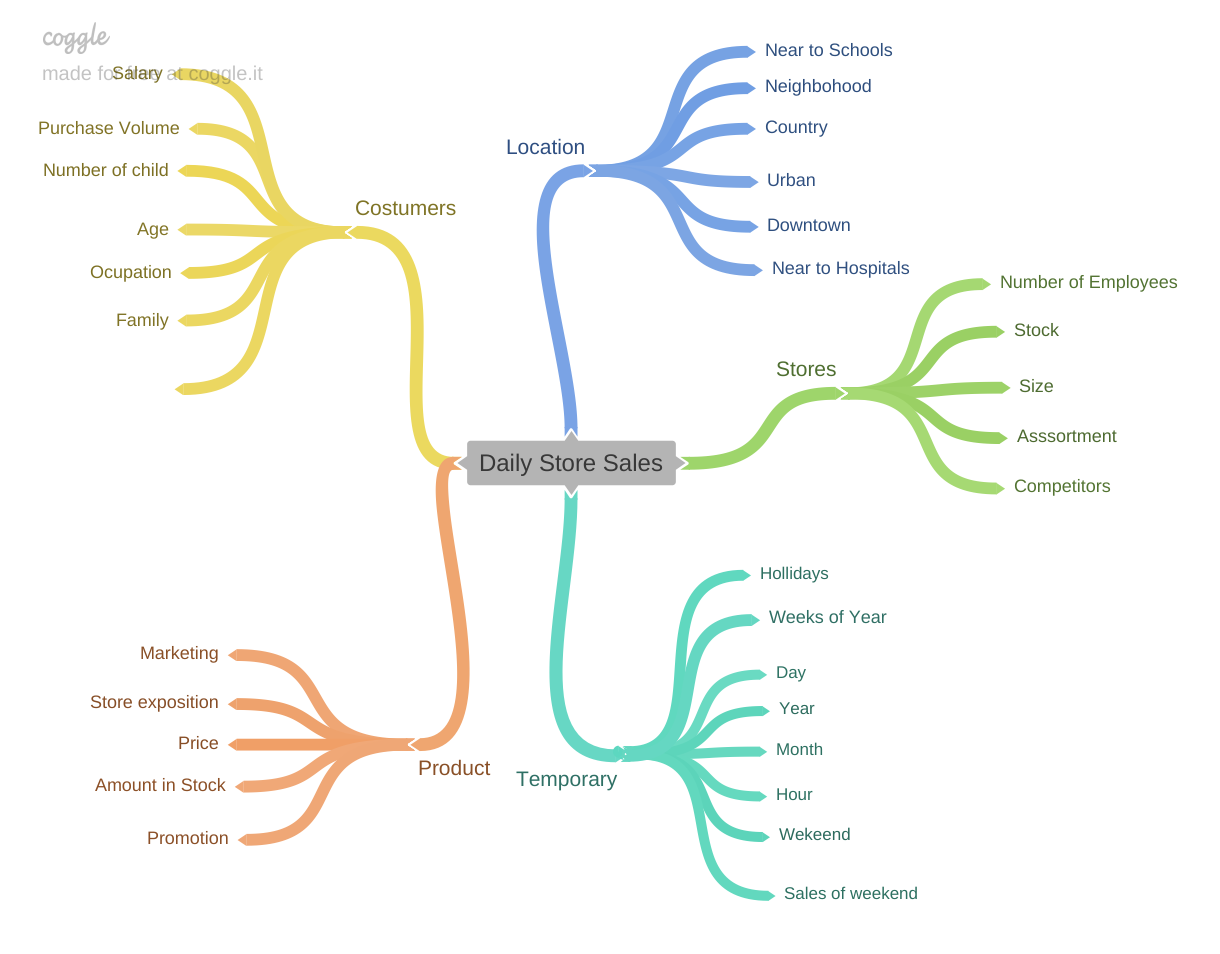

In [42]:
Image ('/Users/adriele/Documents/repos/ds_em_producao/image/mindmap.png')

# <font color='green'> Hipothesys List </font>

 1. - Stores with biggest assortment should sell over/more.
 2. - Stores with competitors around should sell less.
 3. - Stores with longer competitors should sell over/more.
 4. - Stores with activate promotion for more time should sell over/more.
 5. - Stores with more promotion days should sell over/more.
 6. - Stores with consecultive promotion should sell over/more.
 7. - Opened stores on Christimas holliday should sall over/more.
 8. - Stores should sell more throughout the year.
 9. - Stores should sell more on the second semestre of the year.
 10. - Stores  should sell more after 10th day of eatch month.
 11. - Stores should sell less on wekeends.
 12. - Stores should sell less on hollidays school.

# <font color='green'> Exploratory Data Analisys </font>

# <font color='orange'> Response variable

<AxesSubplot:xlabel='sales', ylabel='Density'>

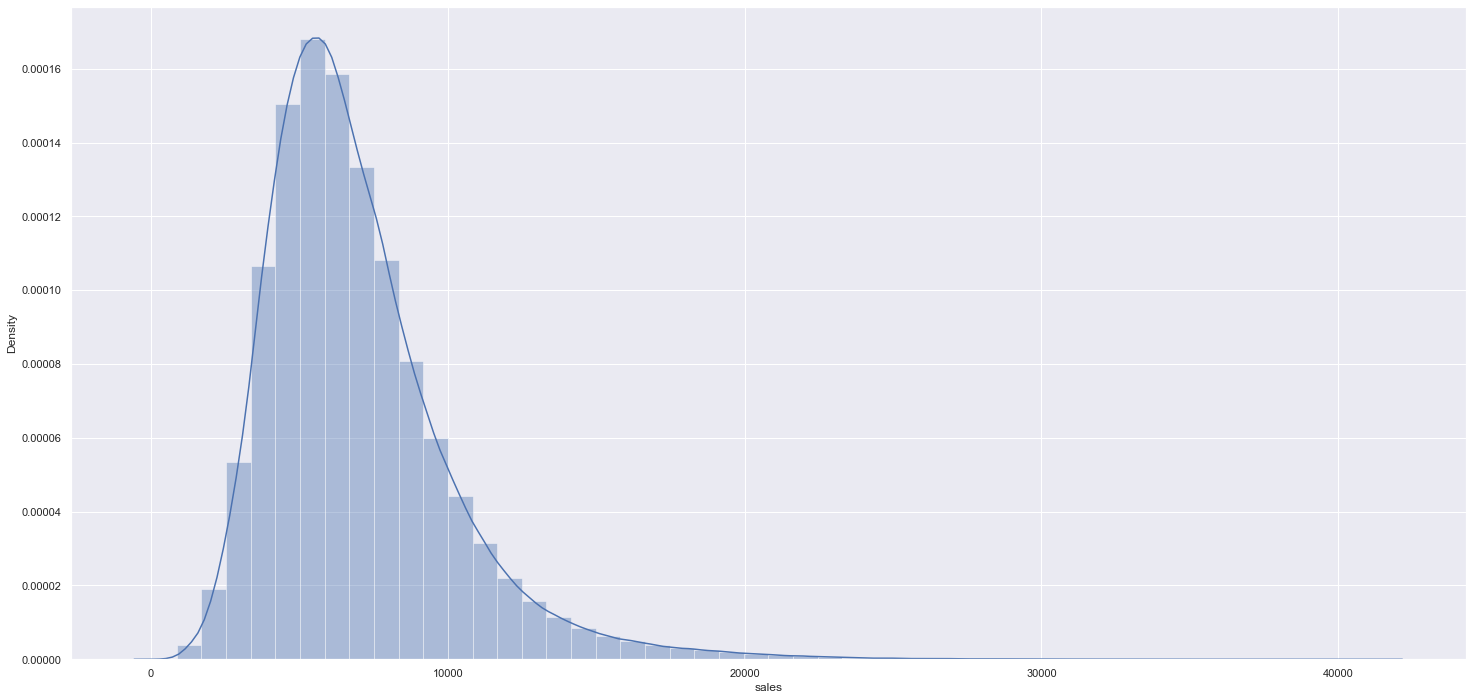

In [50]:
sns.distplot (df4['sales'])

# <font color='orange'> Numerical Variable

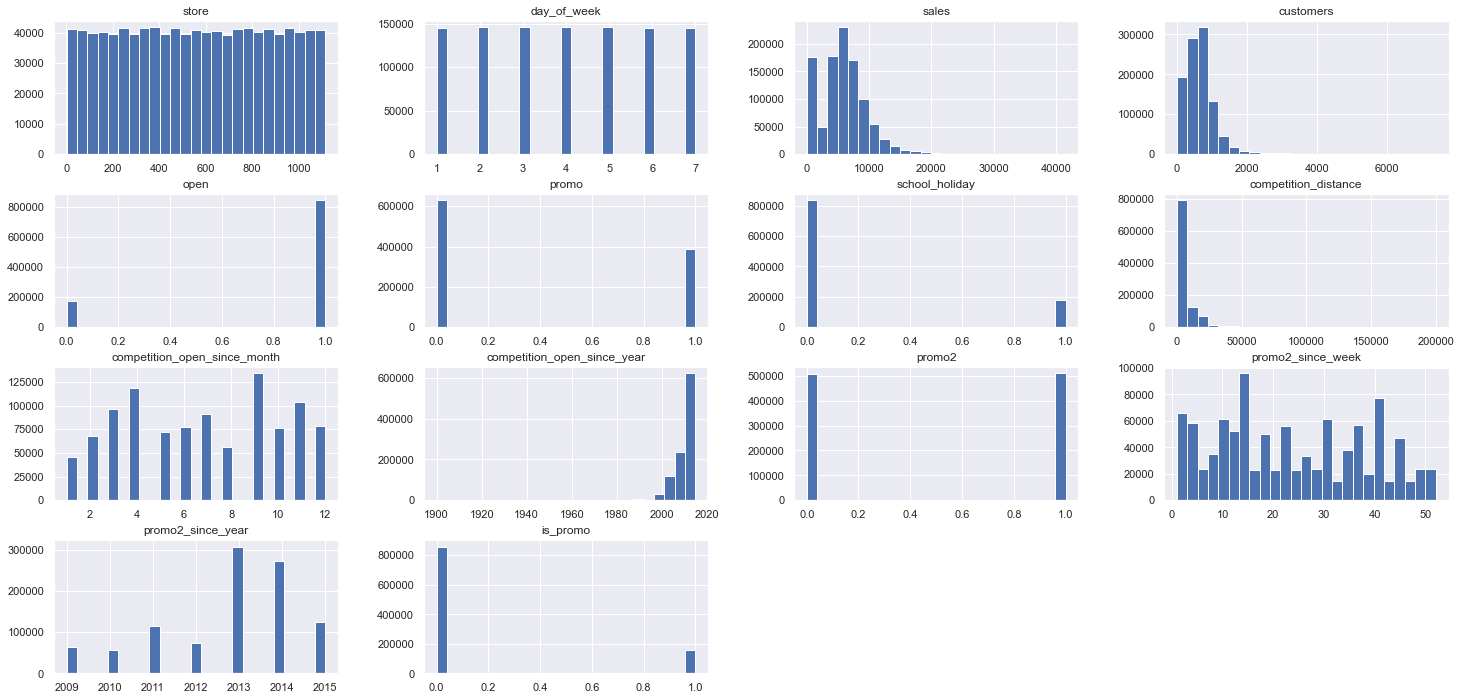

In [51]:
num_attributes.hist(bins =25);


# <font color='orange'> Categorical Variable

In [52]:
df4 ['state_holiday'].drop_duplicates()

0           regular_day
1243     public_holiday
76852    easter_holiday
76953         christmas
Name: state_holiday, dtype: object

<AxesSubplot:xlabel='sales', ylabel='Density'>

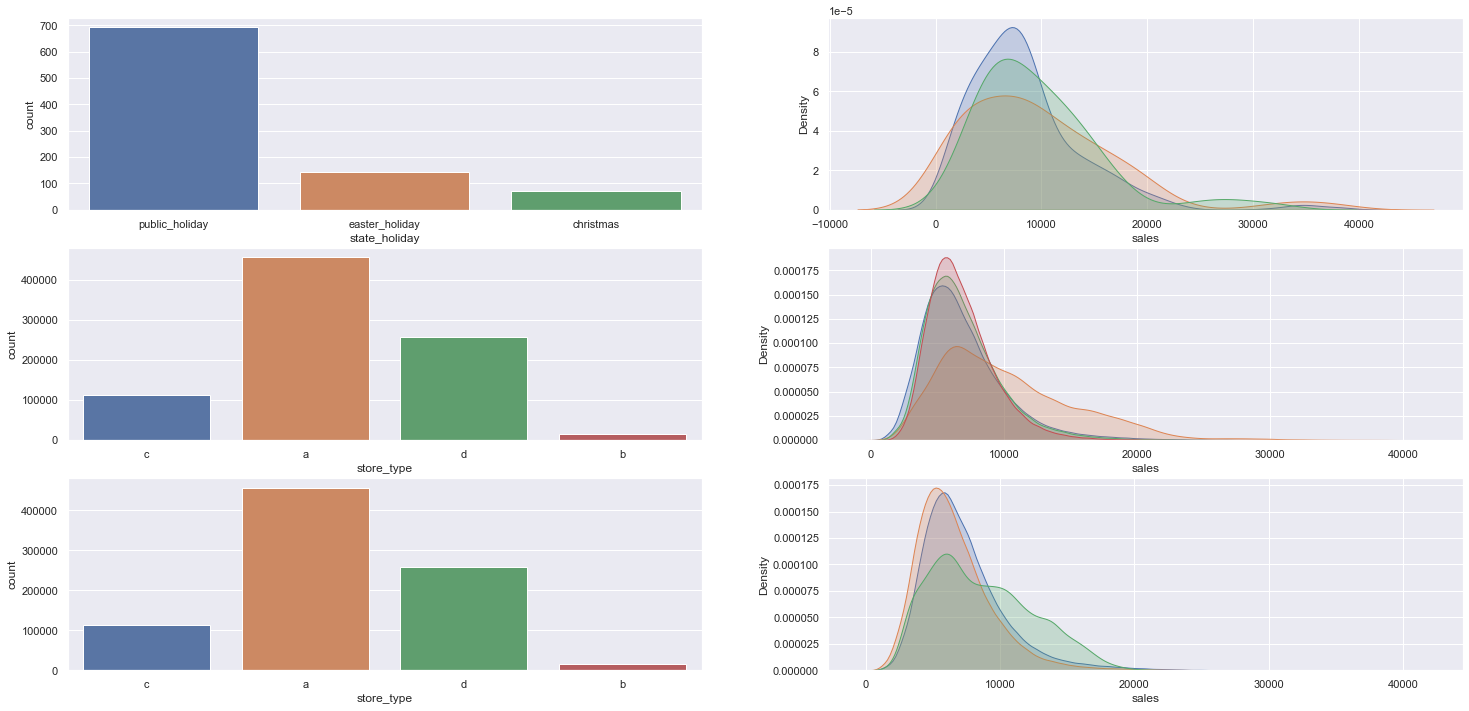

In [53]:
# state Holiday
plt.subplot(3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot(a['state_holiday'])

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'],
            label='public_holiday',
            shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'],
            label='easter_holiday',
            shade=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'],
            label='christmas',
            shade=True)

# store Type
plt.subplot(3, 2, 3)
sns.countplot(df4['store_type'])

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', shade=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', shade=True)

# Assortment
plt.subplot(3, 2, 5)
sns.countplot(df4['store_type'])

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'],
            label='extended',
            shade=True)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'],
            label='basic',
            shade=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'],
            label='extra',
            shade=True)

# <font color='green'> Hypothesys validation

## H1. - Stores with biggest assortment should sell more.

**FALSE** Stores with biggest assortment sell LESS.
 

<AxesSubplot:xlabel='year_week'>

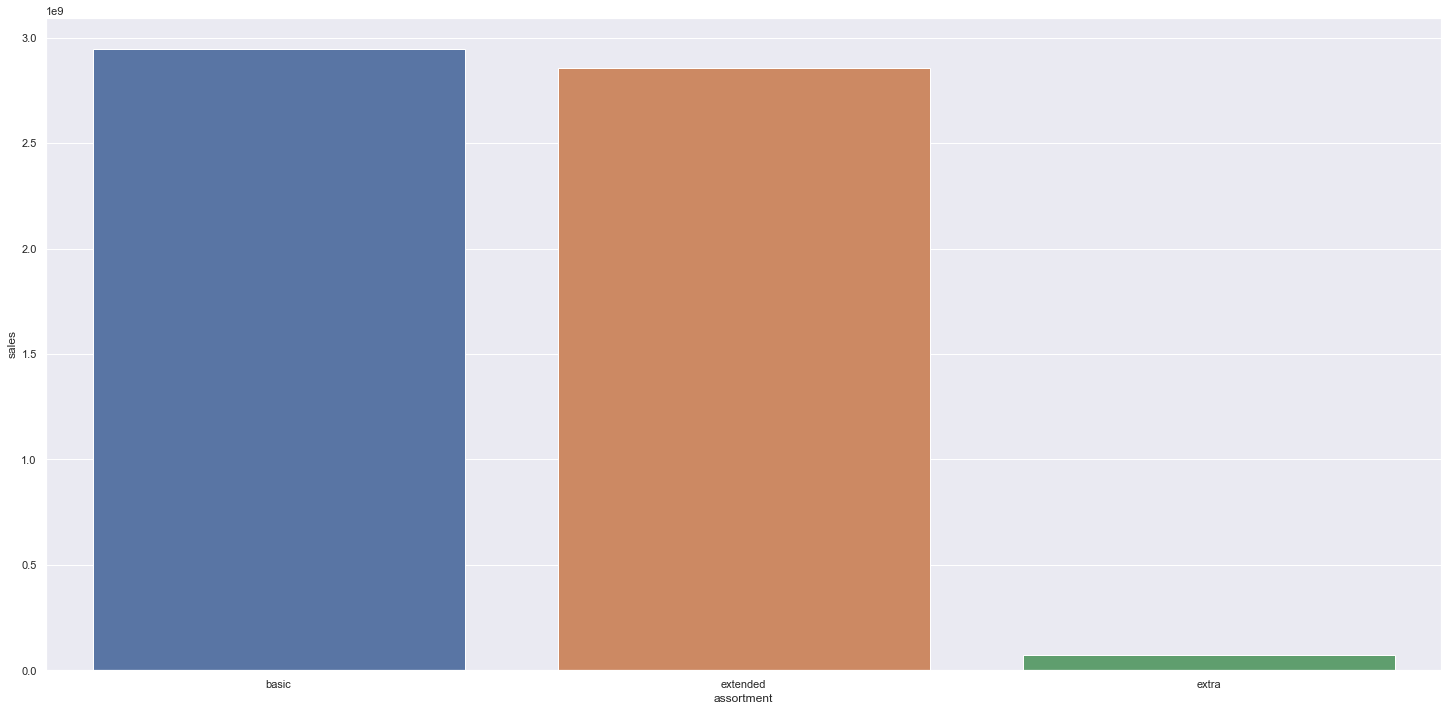

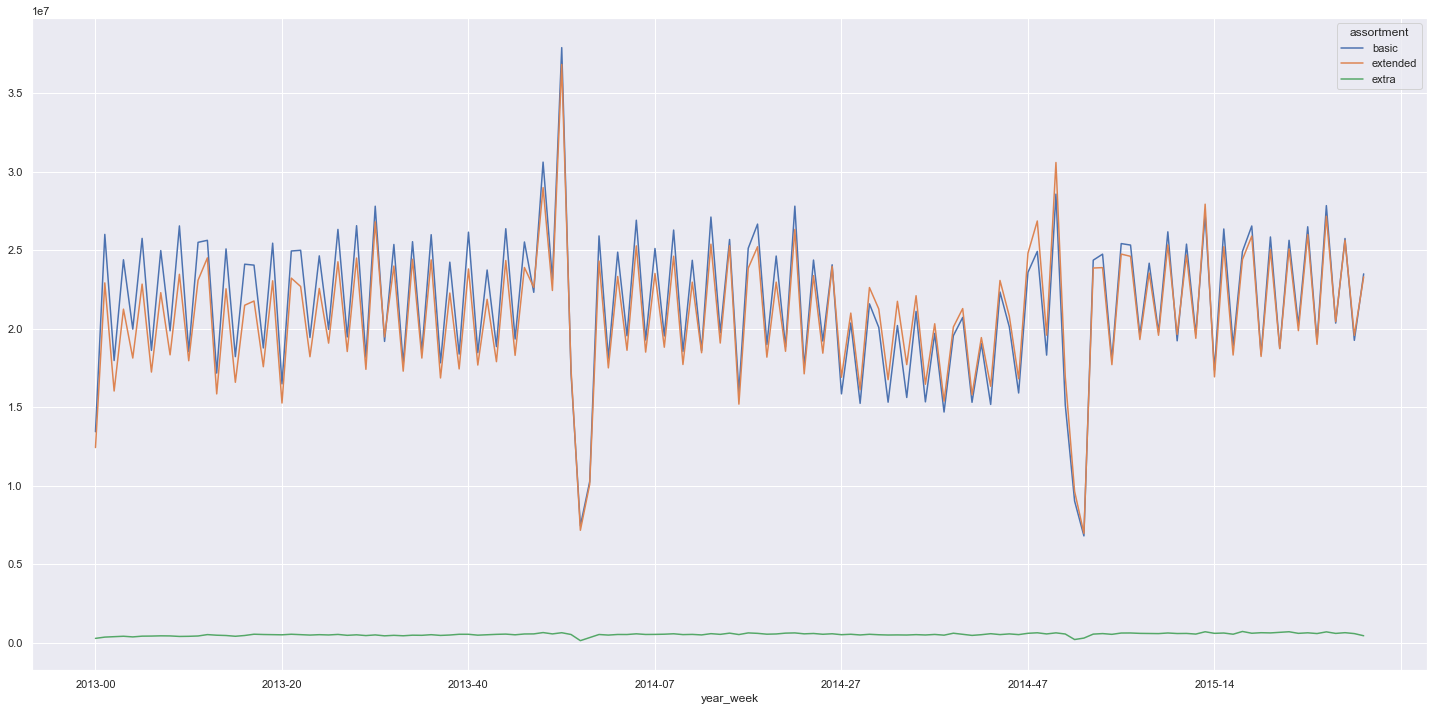

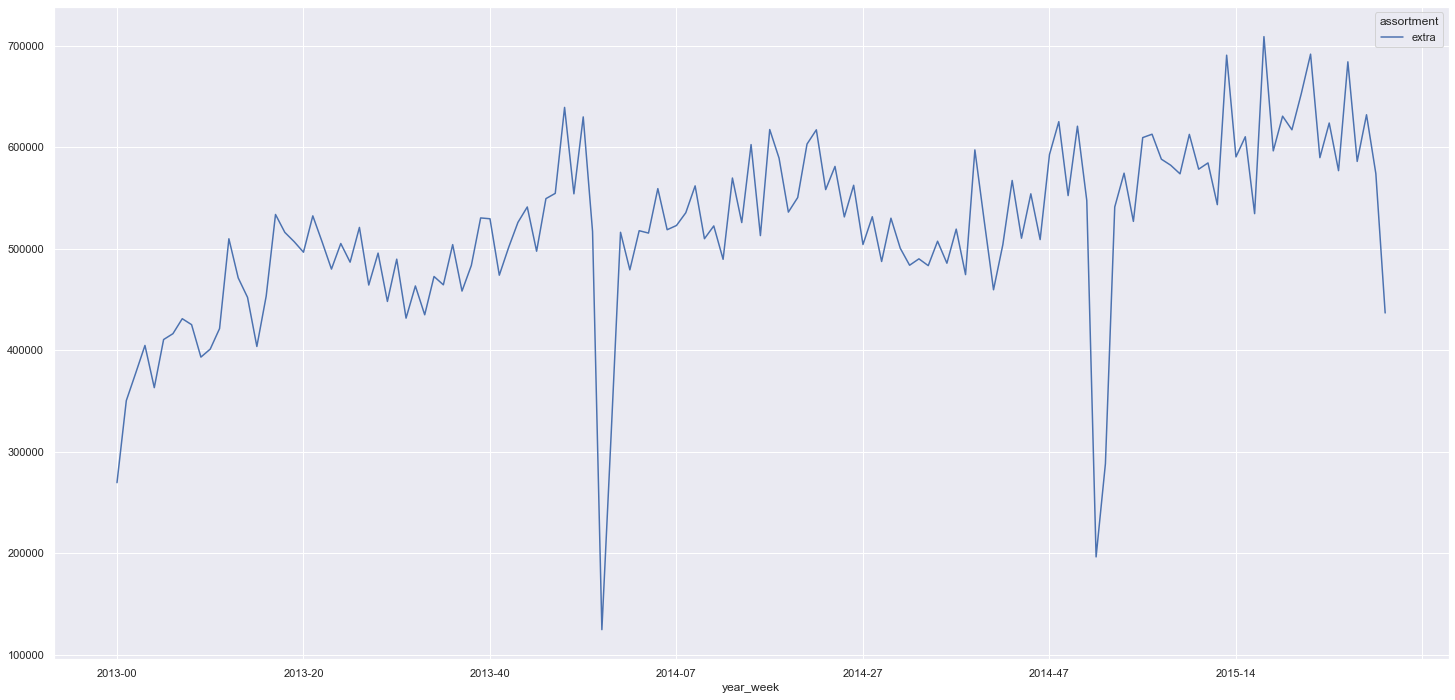

In [54]:
aux1 = df4[['assortment', 'sales']].groupby('assortment').sum().reset_index()
sns.barplot (x = 'assortment', y = 'sales', data= aux1);

aux2 = df4[['year_week', 'assortment', 'sales']].groupby(['year_week', 'assortment']).sum().reset_index()
aux2.pivot (index= 'year_week', columns = 'assortment', values ='sales').plot ()

aux3 = aux2[aux2 ['assortment'] == 'extra'] 

aux3.pivot (index= 'year_week', columns = 'assortment', values ='sales').plot ()

## H2. - Stores with competitors around should sell less.
- **FALSE** Stores with competitiors nearby sells MORE.
 

<AxesSubplot:>

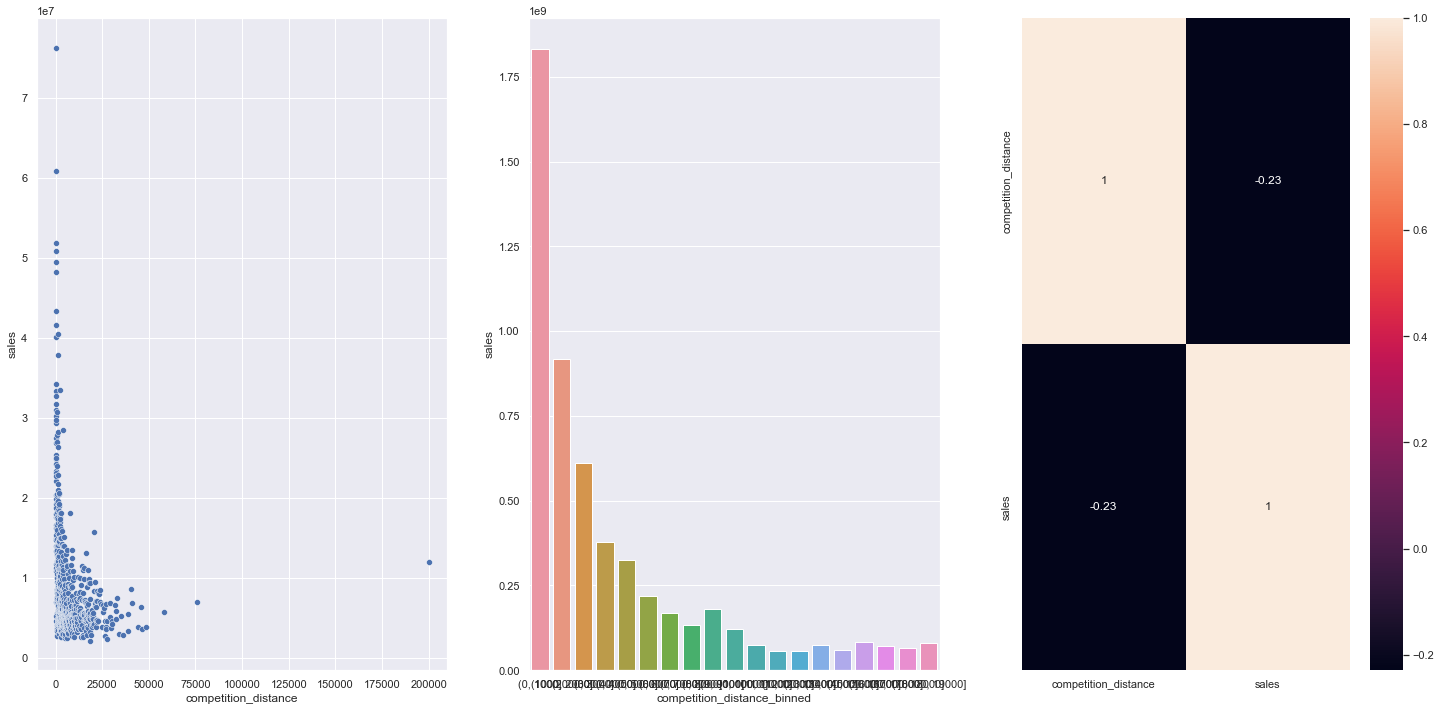

In [55]:
aux1 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index()

# Granulatin
plt.subplot (1,3,1)
sns.scatterplot(x='competition_distance', y='sales', data=aux1)

# Bars
plt.subplot (1,3,2)
bins = list(np.arange(0, 20000, 1000))
aux1['competition_distance_binned'] = pd.cut(aux1['competition_distance'],bins=bins)
aux2 = aux1[['competition_distance_binned', 'sales']].groupby('competition_distance_binned').sum().reset_index()
sns.barplot(x='competition_distance_binned', y='sales', data=aux2)

# Correlation metrics
plt.subplot (1,3,3)
sns.heatmap( aux1.corr (method = 'pearson'), annot = True)



<AxesSubplot:xlabel='competition_distance', ylabel='sales'>

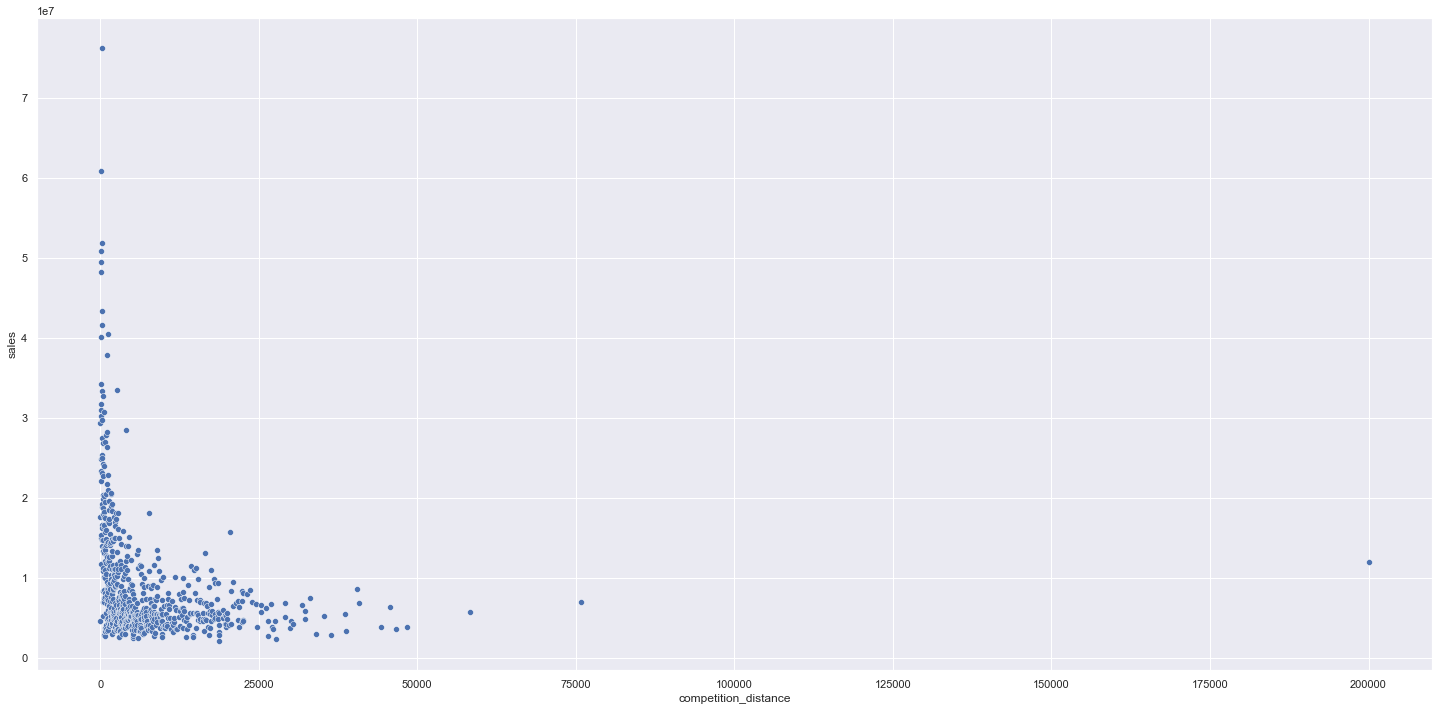

In [56]:
aux3 = df4[['competition_distance','sales']].groupby('competition_distance').sum().reset_index ()
sns.scatterplot(x='competition_distance', y='sales', data=aux3)

## H3 - Opened stores on Christimas holliday should sall over/more.
**FALSE** Opened stores on Christ,mas sell **LESS**.
 

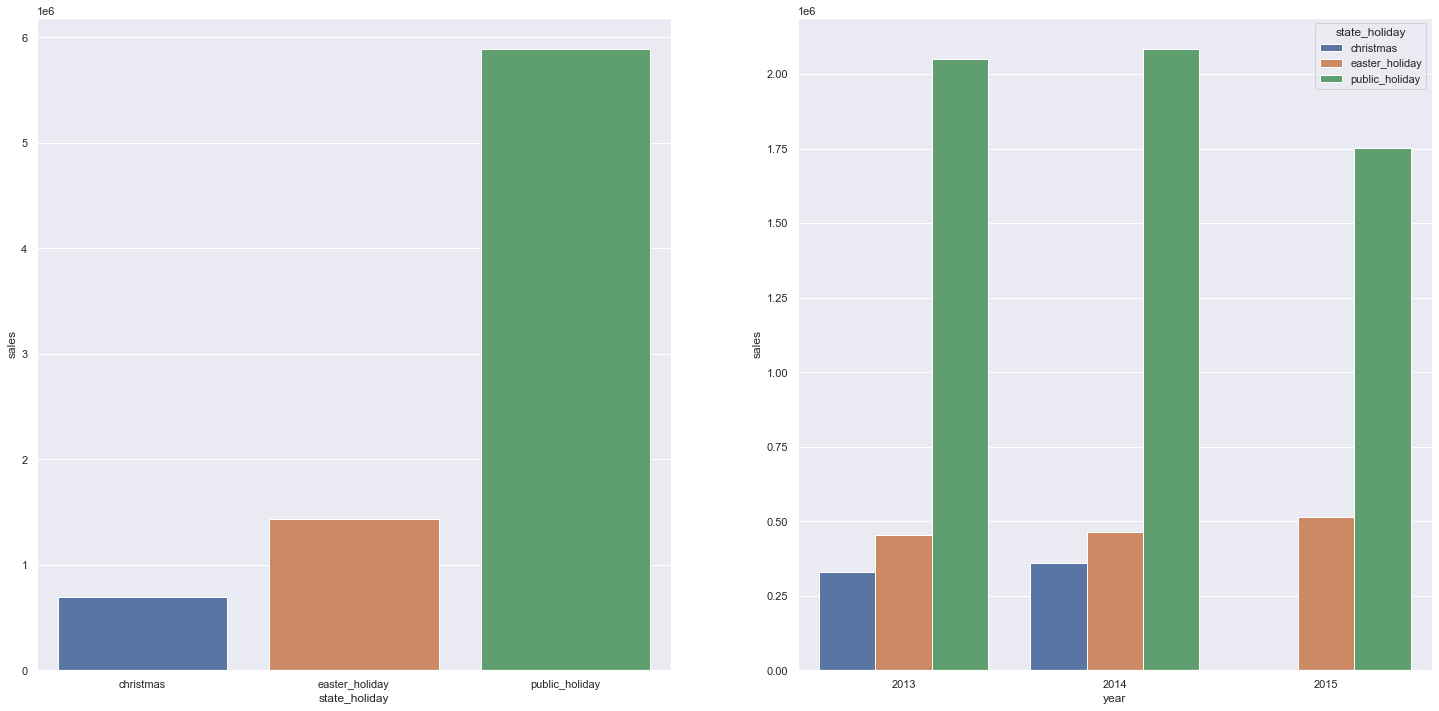

In [61]:
aux = df4[df4['state_holiday'] != 'regular_day']

plt.subplot (1, 2, 1)
aux1 = aux[['state_holiday', 'sales']].groupby ('state_holiday').sum().reset_index()
sns.barplot (x = 'state_holiday', y= 'sales', data =aux1);

plt.subplot (1, 2, 2)
aux2 = aux [['year', 'state_holiday', 'sales']].groupby(['year', 'state_holiday']).sum().reset_index()
sns.barplot (x = 'year', y = 'sales', hue = 'state_holiday', data = aux2);

## H4. - Stores  should sell more after 10th day of eatch month.

**TRUE**
 

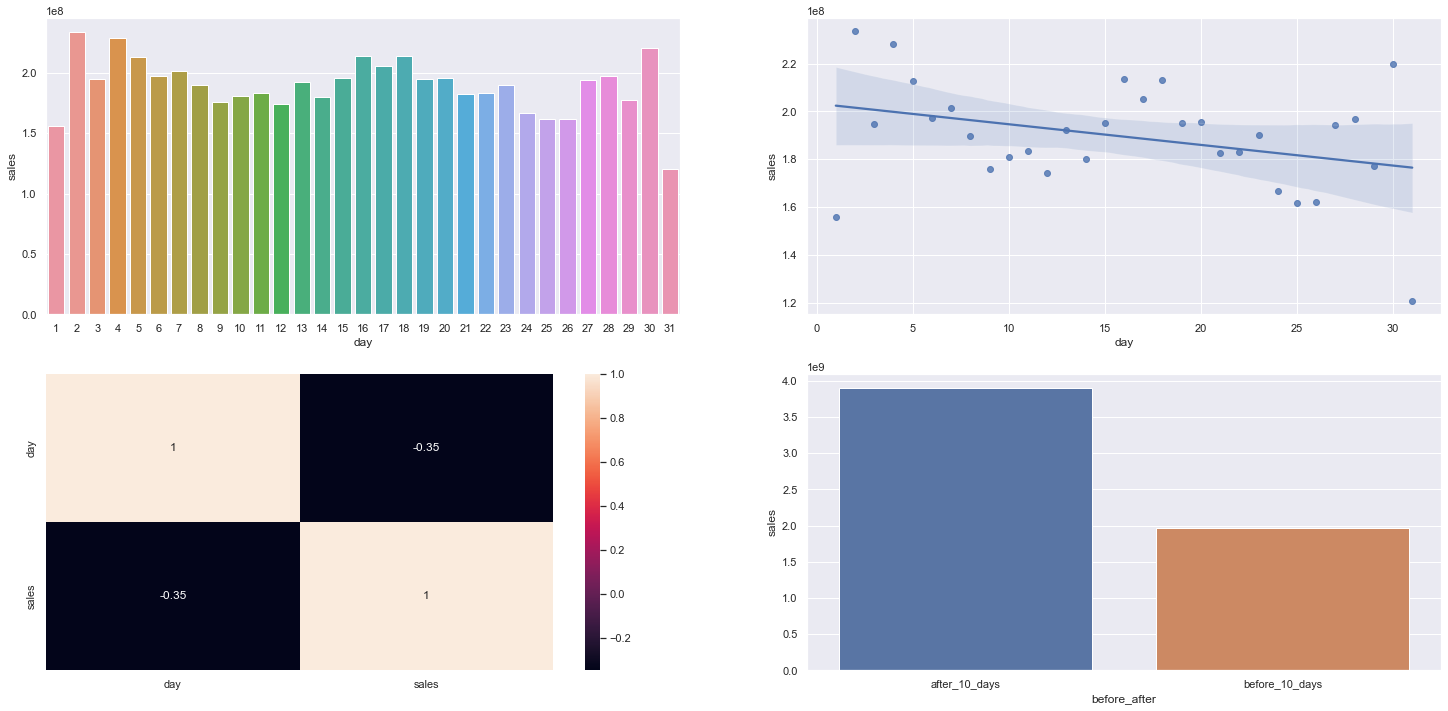

In [64]:
aux1 = df4 [['day', 'sales']].groupby('day').sum().reset_index()

plt.subplot (2, 2, 1)
sns.barplot (x ='day', y = 'sales', data = aux1);

plt.subplot (2, 2, 2)
sns.regplot (x ='day', y = 'sales', data = aux1);

plt.subplot (2, 2, 3)
sns.heatmap (aux1.corr (method = 'pearson'), annot = True);

aux1['before_after'] = aux1['day'].apply(lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2 = aux1 [['before_after', 'sales']].groupby ('before_after').sum().reset_index()

plt.subplot (2, 2, 4)
sns.barplot ( x = 'before_after', y = 'sales', data = aux2);


# <font color='green'> Hipothesys Resume

In [67]:
tab = [[ 'Hipothesys', 'Conclusion', 'Relevance'],
       [ 'H1', 'False', 'Low'],
       [ 'H2', 'False', 'Median'],
       [ 'H3', 'False', 'Median'],
       [ 'H4', 'False', 'Median'],
       [ 'H5', '-', '-'],
       [ 'H6', 'False', 'Low'], 
       [ 'H7', 'False', 'Median'],
       [ 'H8', 'False', 'High'],
       [ 'H9', 'False', 'High'],
       [ 'H10', 'True', 'High'],
       [ 'H11', 'True', 'High'],
       [ 'H12', 'True', 'Low']
      ]

print (tabulate (tab, headers = 'firstrow'))
       



Hipothesys    Conclusion    Relevance
------------  ------------  -----------
H1            False         Low
H2            False         Median
H3            False         Median
H4            False         Median
H5            -             -
H6            False         Low
H7            False         Median
H8            False         High
H9            False         High
H10           True          High
H11           True          High
H12           True          Low


# <font color='green'> Analise Multvariada

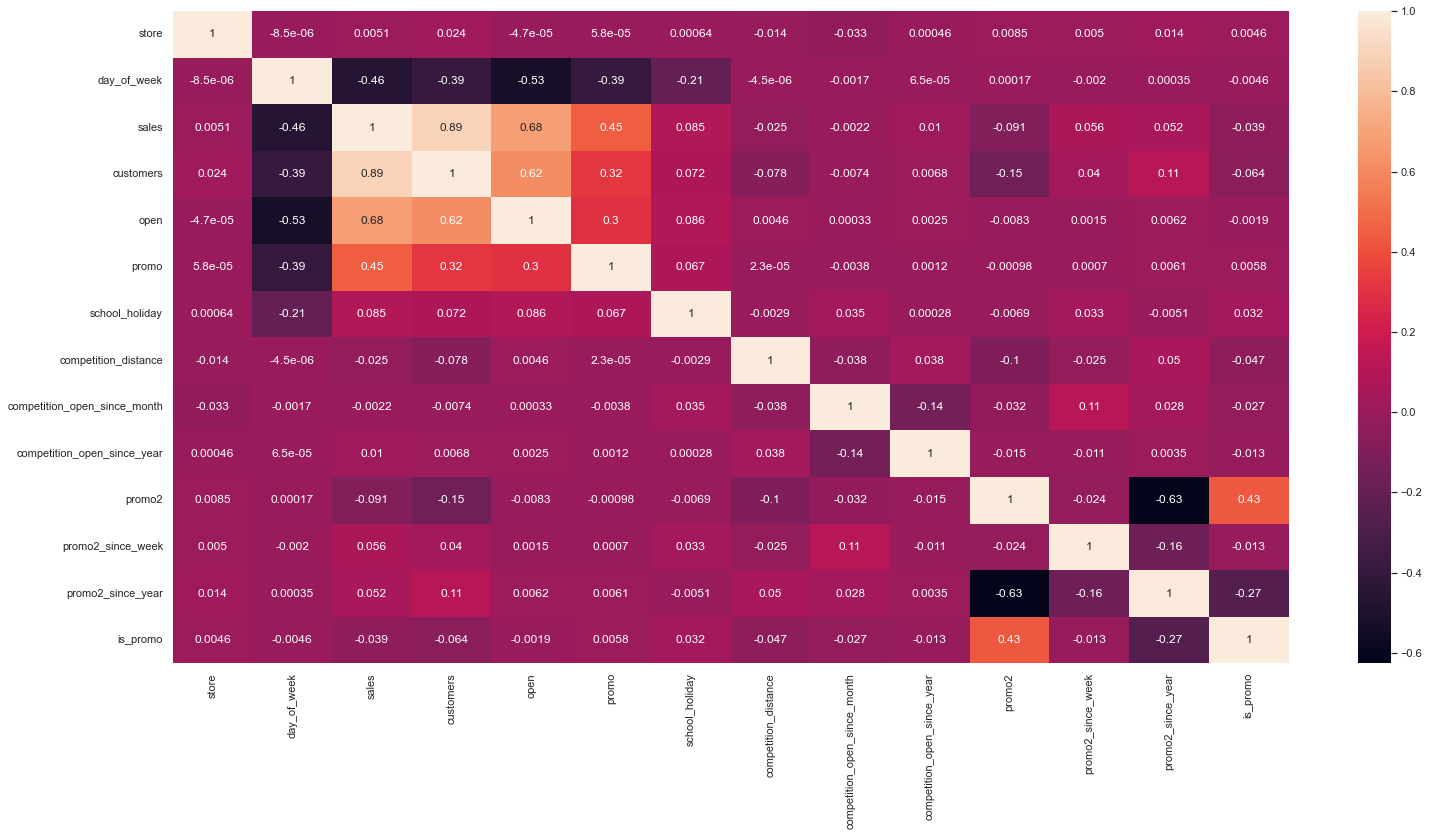

In [68]:
correlation = num_attributes.corr (method = 'pearson')
sns.heatmap (correlation, annot = True);

# <font color='green'>Categorical Attributes

<AxesSubplot:>

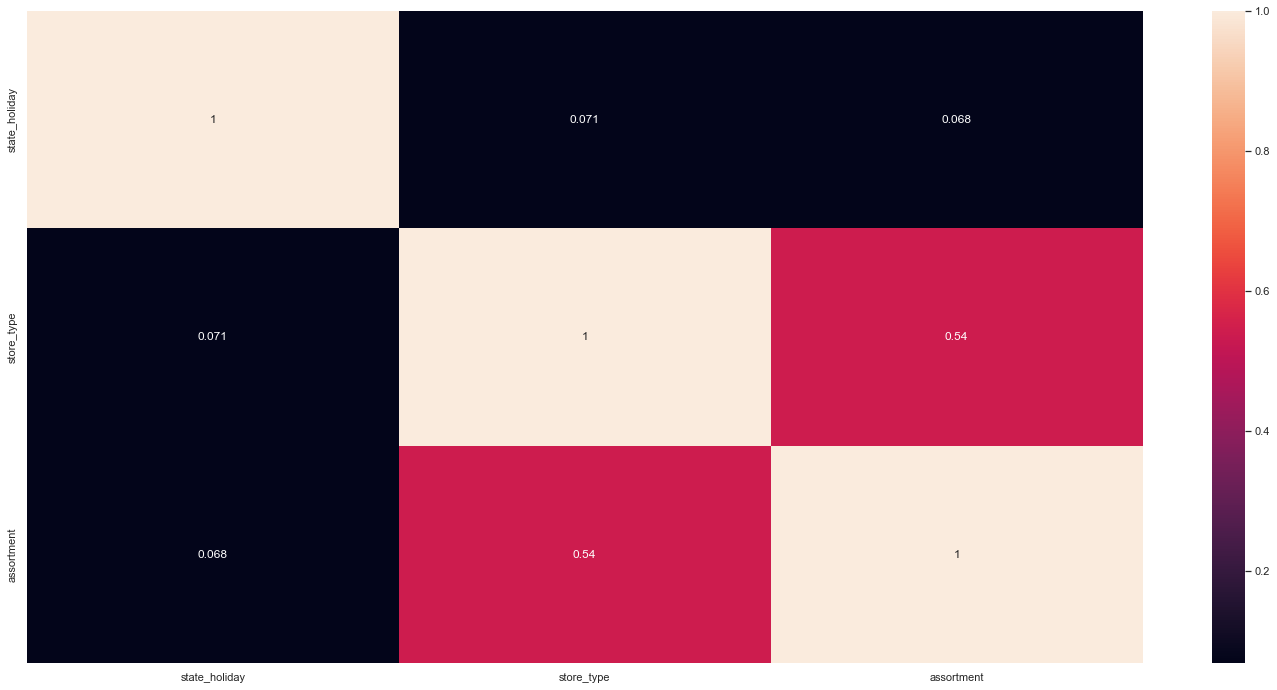

In [69]:
# Only Categorical Data
a = df4.select_dtypes (include = 'object')


# Calculate Data
a1 = cramer_v (a[ 'state_holiday'], a['state_holiday'])
a2 = cramer_v (a[ 'state_holiday'], a['store_type'])
a3 = cramer_v (a[ 'state_holiday'], a['assortment'])

a4 = cramer_v (a[ 'store_type'], a['state_holiday'])
a5 = cramer_v (a[ 'store_type'], a['store_type'])
a6 = cramer_v (a[ 'store_type'], a['assortment'])

a7 = cramer_v (a[ 'assortment'], a['state_holiday'])
a8 = cramer_v (a[ 'assortment'], a['store_type'])
a9 = cramer_v (a[ 'assortment'], a['assortment'])


# Final Dataset
d = pd.DataFrame ({'state_holiday' : [a1, a2, a3],
              'store_type' : [a4, a5, a6],
              'assortment' : [a7, a8, a9]})

d = d.set_index (d.columns)
d

sns.heatmap (d, annot = True)

# <font color='green'> Machine Learning Modelling


 ## <font color='orange'> Compare Model's Performance

In [174]:
modelling_result_cv = pd.concat( [lr_result_cv, lrr_result_cv, rf_result_cv, xgb_result_cv] )
modelling_result_cv

,Model Name,MAE CV,MAPE CV,RSME CV
0,Linear Regression,2081.73 +/- 295.63,0.3 +/- 0.02,2952.52 +/- 468.37
0,Lasso,2116.38 +/- 341.5,0.29 +/- 0.01,3057.75 +/- 504.26
0,Random Forest Regressor,837.65 +/- 217.44,0.12 +/- 0.02,1256.5 +/- 318.06
0,XGBoost Regressor,7047.85 +/- 587.56,0.95 +/- 0.0,7713.93 +/- 688.66


# <font color='fuchsia'>4. Conclusion and Demostration </font>

# <font color='green'> Error Translater and interpretation

In [257]:
# Worst Store to sell
df92.sort_values( 'MAPE', ascending=False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,102487.796875,99129.827071,105845.766679,3357.969804,0.557435
908,909,244467.718750,236550.393364,252385.044136,7917.325386,0.551719
875,876,208040.296875,203913.022365,212167.571385,4127.274510,0.314491
549,550,241853.015625,240509.798129,243196.233121,1343.217496,0.264738
721,722,343838.375000,342093.986579,345582.763421,1744.388421,0.235186


# <font color='green'> Business Performance

<AxesSubplot:xlabel='store', ylabel='MAPE'>

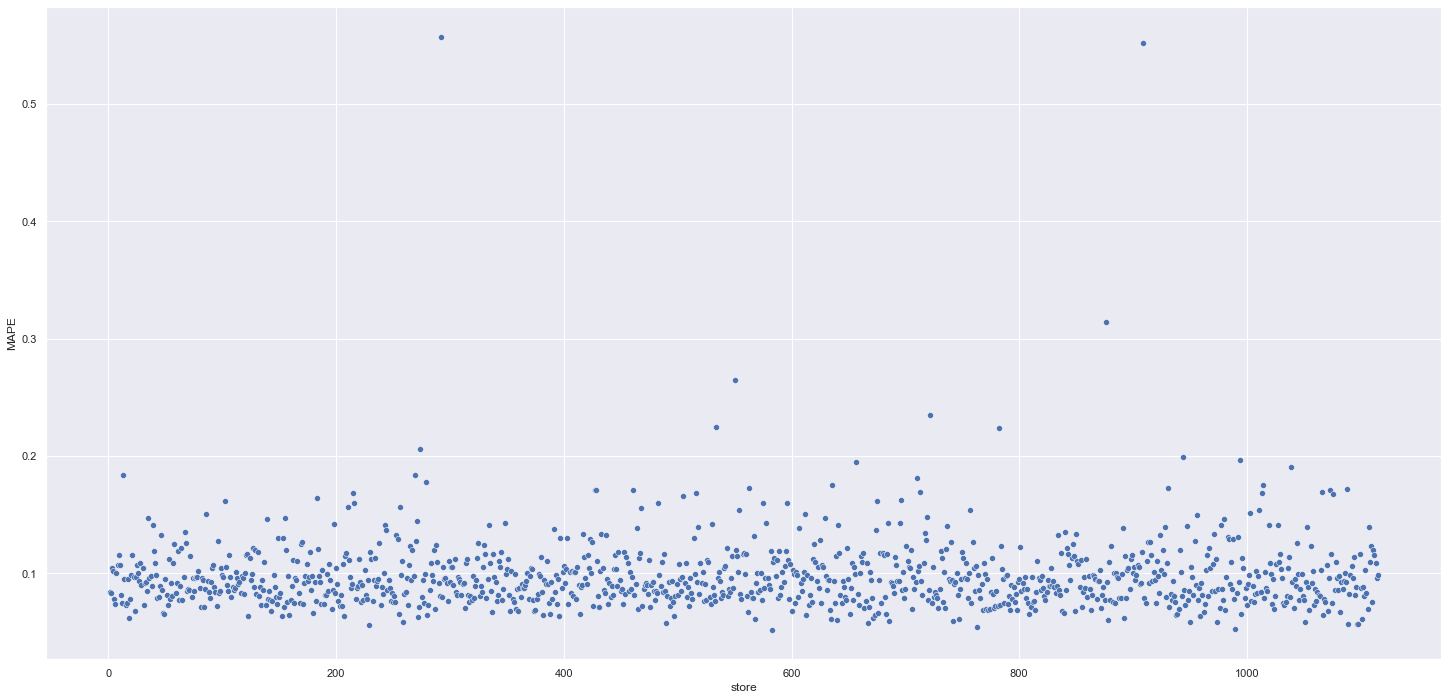

In [183]:

sns.scatterplot( x='store', y='MAPE', data=df92)

# <font color='green'> Total Performace

In [258]:
df93 = df92[['predictions', 'worst_scenario', 'best_scenario']].apply( 
    lambda x: np.sum( x ), axis=0).reset_index().rename( columns= {'index': 'Scenario', 0:'Values'} )

# Add R$
df93['values'] = df93['Values'].map( 'R${:,.2f}'.format)
df93

,Scenario,Values,values
0,predictions,2.860150e+08,"R$286,015,040.00"
1,worst_scenario,2.852642e+08,"R$285,264,158.15"
2,best_scenario,2.867659e+08,"R$286,765,930.96"


# <font color='green'> Machine Learning Performace

<AxesSubplot:xlabel='predictions', ylabel='error'>

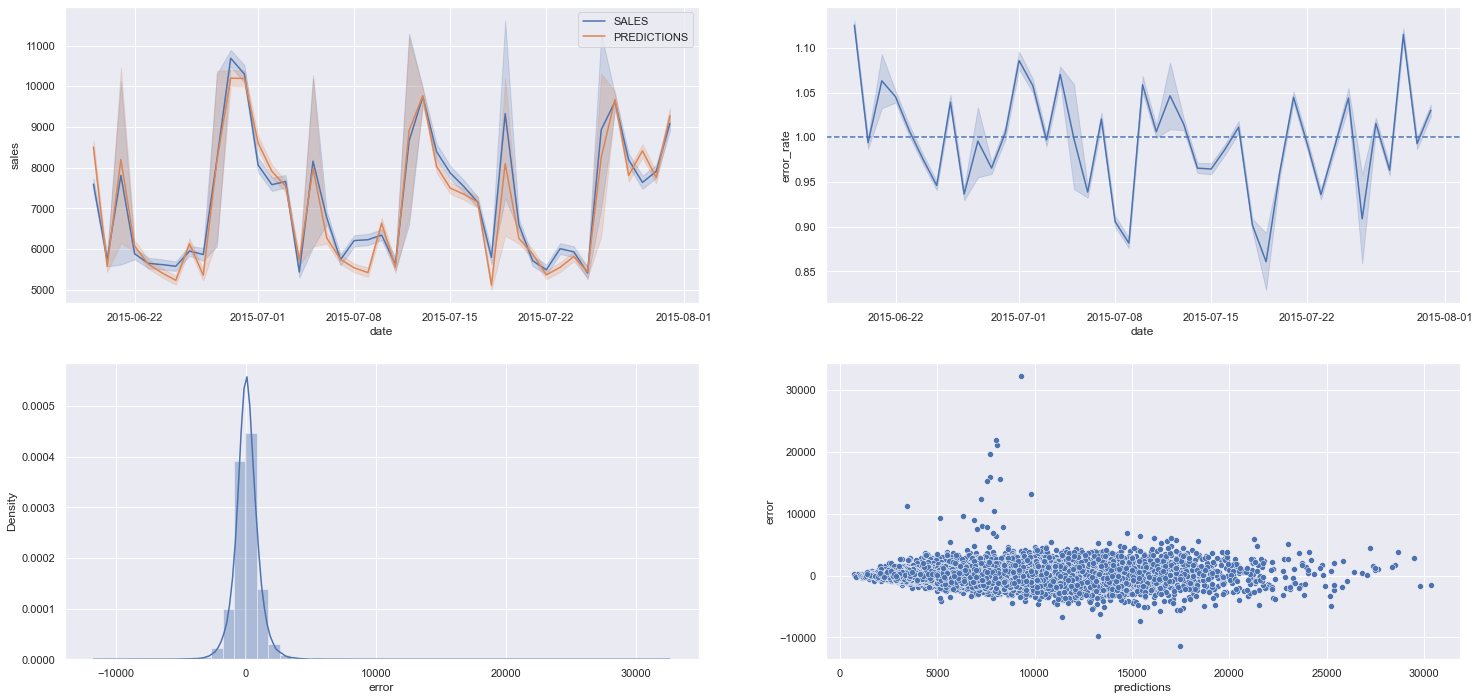

In [216]:
df9['error'] = df9['sales'] - df9['predictions']
df9['error_rate'] = df9['predictions'] / df9['sales']

plt.subplot( 2, 2, 1)
sns.lineplot(x='date', y='sales', data=df9, label='SALES')
sns.lineplot(x='date', y='predictions', data=df9, label='PREDICTIONS')

plt.subplot( 2, 2, 2)
sns.lineplot(x='date', y='error_rate', data=df9 )
plt.axhline( 1, linestyle= '--')


plt.subplot( 2, 2, 3)
sns.distplot(df9['error'])

plt.subplot( 2, 2, 4)
sns.scatterplot(df9 ['predictions'], df9['error'] )



# <font color='fuchsia'>5. Next Steps </font>

- Workshop do Modelo para ps Business users
- Collect feedbacks about usability
- Improve the modelling acuracy in 5% to 10%.

# <font color='fuchsia'>6. Questions & Answers </font>

# <font color='blue'>6. Thank You for Your Atention! </font>